# Building a Movie Recommendation System in Python

In [190]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [191]:
df = pd.read_csv('/Users/aarushikaushik/Desktop/ml-1m/ratings.dat')

In [192]:
column_names=['user_id','item_id','rating','timestamp']
df = pd.read_csv('/Users/aarushikaushik/Desktop/ml-100k/u.data', sep='\t', names=column_names)

In [193]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [194]:
col_name=['item_id','title','genre']
movies_titles = pd.read_csv('/Users/aarushikaushik/Desktop/ml-1m/movies.dat',sep='::', names=col_name)
movies_titles.head()

,item_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Merging data

In [195]:
df=pd.merge(df,movies_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title,genre
0,196,242,3,881250949,Farinelli: il castrato (1994),Drama|Musical
1,63,242,3,875747190,Farinelli: il castrato (1994),Drama|Musical
2,226,242,5,883888671,Farinelli: il castrato (1994),Drama|Musical
3,154,242,3,879138235,Farinelli: il castrato (1994),Drama|Musical
4,306,242,5,876503793,Farinelli: il castrato (1994),Drama|Musical


In [196]:
df.describe()

,user_id,item_id,rating,timestamp
count,98891.000000,98891.000000,98891.000000,9.889100e+04
mean,462.431890,422.756611,3.533527,8.835232e+08
std,266.662362,328.336188,1.124901,5.345106e+06
min,1.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,174.000000,3.000000,8.794482e+08
50%,447.000000,319.000000,4.000000,8.828263e+08
75%,682.000000,628.000000,4.000000,8.882107e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98891 entries, 0 to 98890
Data columns (total 6 columns):
user_id      98891 non-null int64
item_id      98891 non-null int64
rating       98891 non-null int64
timestamp    98891 non-null int64
title        98891 non-null object
genre        98891 non-null object
dtypes: int64(4), object(2)
memory usage: 5.3+ MB


# Exploratory Data Analysis

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Average ratings

In [199]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Gandhi (1982)                 5.0
Thin Blue Line, The (1988)    5.0
Salut cousin! (1996)          5.0
Plutonium Circus (1995)       5.0
Steel (1997)                  5.0
Name: rating, dtype: float64

Count Ratings 

In [200]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Usual Suspects, The (1995)                        583
Kid in King Arthur's Court, A (1995)              509
City Hall (1996)                                  508
Mighty Morphin Power Rangers: The Movie (1995)    507
Perez Family, The (1995)                          485
Name: rating, dtype: int64

In [201]:
rating=pd.DataFrame(df.groupby('title')['rating'].mean())
rating.head()

,rating
title,
'Til There Was You (1997),2.548387
1-900 (1994),3.384615
101 Dalmatians (1996),4.200000
12 Angry Men (1957),4.047619
187 (1997),1.666667


Setting Column for Number of Ratings

In [202]:
rating['number_of_ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
rating.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (1997),1.666667,3


Visualizing the number of ratings

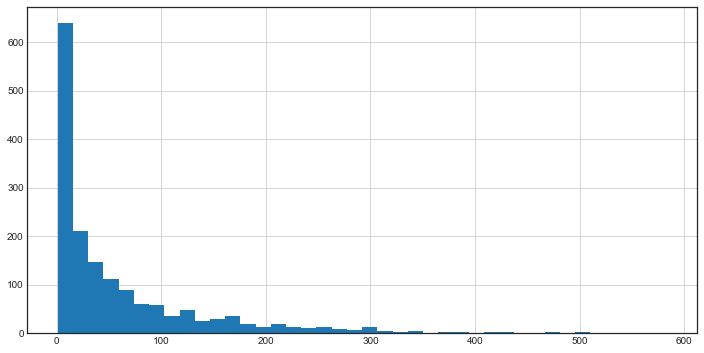

In [203]:
plt.figure(figsize=(12,6))
rating['number_of_ratings'].hist(bins=40)

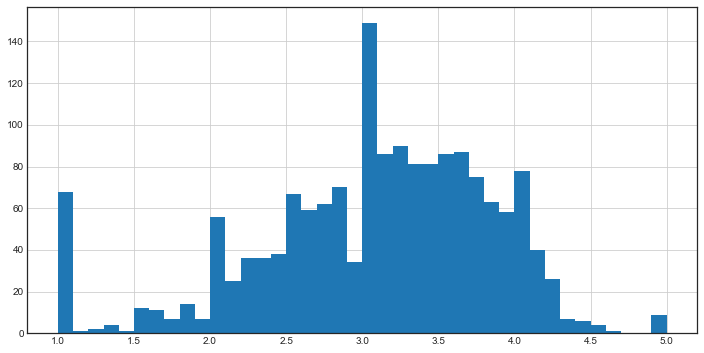

In [204]:
plt.figure(figsize=(12,6))
rating['rating'].hist(bins=40)


Most common rating can be seen as around 3.0 mark

# Recommending Similar Movies

The next step is to create a martix that has the user ids on one axis and the movie titles on another. Each cell will then consist of the rating of a movie by a particular user

In [205]:
movie_matrix = df.pivot_table(index='user_id',columns='title',values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"301, 302 (1995)","39 Steps, The (1935)",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


It's normal for there to be lots of NaN values, as not everyone would have seen most movies or rated each movie they watched.

Checking the most rated movie

In [206]:
rating.sort_values('number_of_ratings',ascending=False).head(10)

,rating,number_of_ratings
title,,
"Usual Suspects, The (1995)",4.358491,583
"Kid in King Arthur's Court, A (1995)",3.803536,509
City Hall (1996),4.155512,508
Mighty Morphin Power Rangers: The Movie (1995),4.007890,507
"Perez Family, The (1995)",3.156701,485
Nemesis 2: Nebula (1995),3.656965,481
Natural Born Killers (1994),3.441423,478
Toy Story (1995),3.878319,452
Quiz Show (1994),3.631090,431


In [207]:
rating.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.548387,31
1-900 (1994),3.384615,13
101 Dalmatians (1996),4.200000,5
12 Angry Men (1957),4.047619,21
187 (1997),1.666667,3


In [208]:
usual_suspects_ratings = movie_matrix['Usual Suspects, The (1995)']
city_hall_ratings = movie_matrix['City Hall (1996)']
usual_suspects_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Usual Suspects, The (1995), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [209]:
similarity_with_Usual_Suspects = movie_matrix.corrwith(usual_suspects_ratings) 
similarity_with_City_Hall = movie_matrix.corrwith(city_hall_ratings)


Let's clean the data by removing NaN values and using a DataFrame instead of a series:

In [210]:
corr_Usual_Suspects = pd.DataFrame(similarity_with_Usual_Suspects,columns=['Correlation'])
corr_Usual_Suspects.dropna(inplace=True)
corr_Usual_Suspects.head()

,Correlation
title,
'Til There Was You (1997),-0.069030
1-900 (1994),-0.179605
12 Angry Men (1957),0.219846
187 (1997),0.500000
2 Days in the Valley (1996),0.101015



If we sort the dataframe by correlation, we should get the most similar movies, however there will be some results that don't really make sense.

This is because there are a lot of movies only watched once by users who also watched Usual Suspects (it was the most popular movie).

In [211]:
corr_Usual_Suspects.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Sophie's Choice (1982),1.0
I Shot Andy Warhol (1996),1.0
Evita (1996),1.0
Shall We Dance? (Shall We Dansu?) (1996),1.0
Grease (1978),1.0
"Usual Suspects, The (1995)",1.0
Forbidden Planet (1956),1.0
Prisoner of the Mountains (Kavkazsky Plennik) (1996),1.0
Jaws 3-D (1983),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [212]:
corr_Usual_Suspects = corr_Usual_Suspects.join(rating['number_of_ratings'], on='title', how='left', lsuffix='_left', rsuffix='_right')
corr_Usual_Suspects.head(10)

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),-0.069030,31
1-900 (1994),-0.179605,13
12 Angry Men (1957),0.219846,21
187 (1997),0.500000,3
2 Days in the Valley (1996),0.101015,10
"20,000 Leagues Under the Sea (1954)",-0.061554,31
2001: A Space Odyssey (1968),-0.144673,85
"301, 302 (1995)",-0.197935,90
"39 Steps, The (1935)",0.007246,21



Now sort the values and notice how the titles make a lot more sense:

In [213]:
corr_Usual_Suspects[corr_Usual_Suspects['number_of_ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,number_of_ratings
title,,
"Usual Suspects, The (1995)",1.000000,583
Johnny Mnemonic (1995),0.747981,367
Mighty Morphin Power Rangers: The Movie (1995),0.672556,507
Jury Duty (1995),0.536117,420
Immortal Beloved (1994),0.377433,130


Now the same for City Hall

In [214]:
corr_City_Hall = pd.DataFrame(similarity_with_City_Hall,columns=['Correlation'])
corr_City_Hall.dropna(inplace=True)
corr_City_Hall.head()

,Correlation
title,
'Til There Was You (1997),-0.214840
1-900 (1994),0.392972
101 Dalmatians (1996),0.641689
12 Angry Men (1957),-0.051631
2 Days in the Valley (1996),-0.790569


In [215]:
corr_City_Hall.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Candyman (1992),1.0
Children of the Revolution (1996),1.0
I'm Not Rappaport (1996),1.0
Desperate Measures (1998),1.0
Intimate Relations (1996),1.0
"Amityville Horror, The (1979)",1.0
Amityville 3-D (1983),1.0
"Grand Day Out, A (1992)",1.0
"American Werewolf in London, An (1981)",1.0


In [216]:
corr_City_Hall = corr_City_Hall.join(rating['number_of_ratings'], on='title', how='left', lsuffix='_left', rsuffix='_right')
corr_City_Hall.head(10)

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),-0.214840,31
1-900 (1994),0.392972,13
101 Dalmatians (1996),0.641689,5
12 Angry Men (1957),-0.051631,21
2 Days in the Valley (1996),-0.790569,10
"20,000 Leagues Under the Sea (1954)",-0.090995,31
2001: A Space Odyssey (1968),0.138327,85
"301, 302 (1995)",0.086516,90
"39 Steps, The (1935)",0.166662,21


In [217]:
corr_City_Hall[corr_City_Hall['number_of_ratings']>100].sort_values('Correlation',ascending=False).head()


,Correlation,number_of_ratings
title,,
City Hall (1996),1.000000,508
Clerks (1994),0.381159,136
"Star Maker, The (Uomo delle stelle, L') (1995)",0.370915,187
"Postino, Il (The Postman) (1994)",0.355031,175
"Program, The (1993)",0.353408,173


And we are done! We can see that Clerks is the second highly correlated movie and so on.